<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p024_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Objectif

Entraîner des embeddings en tentant de prédire la polarité des reviews du dataset `Large Movie Review Dataset`

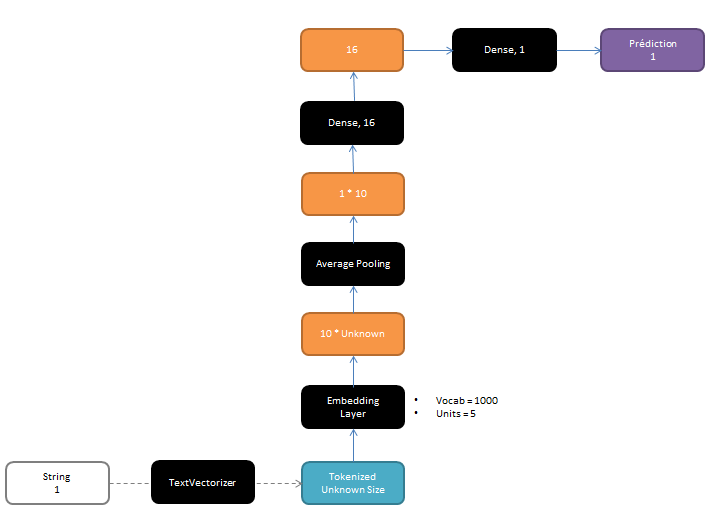

# Récupération des données et construction du dataset
 * Url du dataset : https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
 * Utiliser la fonction `tf.keras.utils.get_file()` pour récupérer les données
 * Les données sont dans le folder `train`
 * Remove le folder `unsup` dans le folder `train` afin qu'il ne reste que deux subfolders `neg` et `pos`
 * Utilisez `tf.keras.utils.text_dataset_from_directory()` afin de construire le train dataset et le val dataset
 * Parcourir les données via la méthode `.take()`

# Preprocessing des données
 * Créer une fonction qui standardize le text d'entrée (batch de texte)
 * Instancier un layer de Text Vectorizer via `TextVectorization`
   * Vocab size = 10000
   * Max length sequence = 100
   * Fonction de standardization
 * Utiliser la .map() méthode de dataset afin de créer un text only dataset qui servira d'input au vectorizer.adapt()

# Création du modèle

 * Le vectorize_layer
 * Embedding() avec 16 unités
 * GlobalAveragePooling1D()
 * Dense avec 16 units et activation relu
 * Dense avec 1 unité


# Compile & Train the model

 * *compile()*
   * adam optimizer avec valeur par défaut
   * binary cross entropy avec logits
   * accuracy comme métrique
 * *fit()*
   * epoch = 15
   * tensorboard callback : `tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")`

In [ ]:
# Ouvrir tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

# Récupérez les embeddings

 * On peut accéder aux poids avec `.get_layer(nom_du_layer)`
 * `.get_weights()` renvoie une liste de tensors de weights
 * `weights = model.get_layer('embedding').get_weights()[0]`



# Sauvegarder les embeddings
Afin de pouvoir visualiser les embeddings sur http://projector.tensorflow.org/, on doit créer deux fichiers :    
 * Un fichier `word.tsv` qui contient les mots ligne par ligne dans l'ordre de leur token index
 * Un fichier `vectors.tsv` qui contient la valeur des vecteurs, chaque ligne i correspondant au vecteur du mot de l'index i
 * On utilise `io.open('vectors.tsv', 'w', encoding='utf-8')` pour ouvrir le fichier
 * On boucle sur le vocab, a chaque nouveau mot, excepté le tout premier utilisé pour le padding, on ajoute les informations aux deux fichiers
 * Ne pas oublier de fermer les fichiers avec `out_v.close()`

In [ ]:
# Afin d'enregistrer les fichiers crées sur notre drive perso
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass